  # Project: Loan Default Predictor

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv(r'E:\My_Portfolio_Projects\ML Models\Loan_prediction_model\lending_club_loan_two.csv', encoding='utf-8') 


In [4]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

#### *Remove Unnecessary Columns*

In [8]:

df.drop(['address','issue_d','title','earliest_cr_line'], axis=1 , inplace = True )


### Fix data types  

In [9]:
df.dtypes


loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object

In [10]:

categorical_cols = ['term', 'grade', 'sub_grade', 'verification_status', 'home_ownership', 'initial_list_status', 'application_type',
                    'loan_status','purpose', 'emp_title']
for col in categorical_cols : 
   df[col] =  df[col].astype('category')

In [11]:
df['loan_amnt'] = df['loan_amnt'].replace({r'\$' : '' , ',' : ''} , regex = True).astype(float)

In [12]:
df.dtypes

loan_amnt                float64
term                    category
int_rate                 float64
installment              float64
grade                   category
sub_grade               category
emp_title               category
emp_length                object
home_ownership          category
annual_inc               float64
verification_status     category
loan_status             category
purpose                 category
dti                      float64
open_acc                 float64
pub_rec                  float64
revol_bal                float64
revol_util               float64
total_acc                float64
initial_list_status     category
application_type        category
mort_acc                 float64
pub_rec_bankruptcies     float64
dtype: object

### Understand Missing Data

In [13]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [14]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
loan_amnt               0.000000
purpose                 0.000000
term                    0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
loan_status             0.000000
dtype: float64

#### defining colors

In [15]:
color1 = '#205DF6'
color2 = '#24D5FF'

### Exploratory Data Analysis

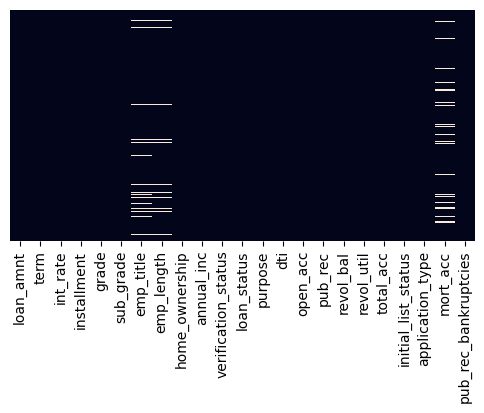

In [16]:
plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False , color = color2, edgecolor = color1)
plt.show()

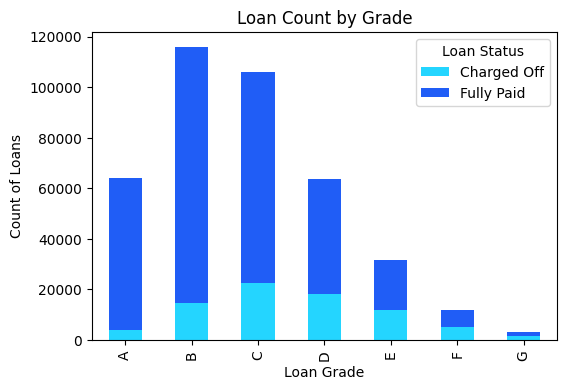

In [17]:
stacked_data = df.groupby(['grade', 'loan_status'] , observed=True).size().unstack(fill_value=0)

ax = stacked_data.plot(kind='bar', stacked=True , figsize=(6, 4) , color = [color2, color1])
plt.title("Loan Count by Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Count of Loans")
plt.legend(title="Loan Status")
ax.set_facecolor(color='white')
plt.show()

In [18]:
# # List of crucial categorical columns
# crucial_columns = ['grade','home_ownership', 'application_type']

# # Create subplots: one row with as many columns as we have crucial columns
# fig, axes = plt.subplots(1, len(crucial_columns), figsize=(6 * len(crucial_columns), 6))

# # for ax, col in zip(axes, crucial_columns):

# #     df_cleaned[col].value_counts().plot(kind='bar', ax=ax, color=color2)
# #     ax.set_title(f'Count of Loans by {col}', fontsize=14, fontweight='bold')
# #     ax.set_xlabel(col, fontsize=12)
# #     ax.set_ylabel("Count", fontsize=12)
# #     ax.tick_params(axis='x', rotation=45)

#                    # OR

# for i, col in enumerate(crucial_columns):
#     df[col].value_counts().plot(kind='bar', ax=axes[i], color=color1)
#     axes[i].set_title(f'Count of Loans by {col}', fontsize=14, fontweight='bold')
#     axes[i].set_xlabel(col, fontsize=12)
#     axes[i].set_ylabel("Count", fontsize=12)
#     axes[i].tick_params(axis='x', rotation=0)

# plt.tight_layout()
# plt.show()



In [19]:
# plt.figure(figsize=(7,5))
# sns.boxplot(x='grade', y='annual_inc', data=df, linecolor = 'black' , color = color2)
# plt.title("Annual Income Distribution by Loan Grade")
# plt.xlabel("Loan Grade")
# plt.ylabel("Annual Income")
# plt.show()           

In [20]:
# plt.figure(figsize=(6,4))
# sns.stripplot(data=df[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']] , color=color1)
# plt.xticks(rotation=45)
# plt.title("Box Plot of Numeric Features")
# plt.show()

In [21]:
# selected_cols = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'installment', 'revol_bal', 'revol_util', 'open_acc', 'mort_acc']  

# fig, axes = plt.subplots(3, 3, figsize=(14, 7))
# axes = axes.flatten() 

# for i, col in enumerate(selected_cols):
#     sns.histplot(df[col], bins=40, kde=True, ax=axes[i], color=color1)
#     axes[i].set_title(f'Distribution of {col}', fontsize=12)
#     axes[i].set_xlabel(col, fontsize=8)
#     axes[i].set_ylabel('Frequency', fontsize=8)

# for j in range(i+1, len(axes)):  
#     fig.delaxes(axes[j])

# plt.subplots_adjust(hspace=0.4, wspace=0.3)
# plt.tight_layout()
# plt.show()

In [22]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [23]:
# selected_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti','revol_bal','revol_util','total_acc']
# sns.pairplot(df[selected_features], diag_kind='kde', palette=[color1, color2])
# plt.suptitle("Pairwise Relationships Among Loan Features", y=1.02)
# plt.show()

In [24]:
# # Check class distribution
# class_counts = df['loan_status'].value_counts()

# plt.figure(figsize=(6,4))
# plt.bar(class_counts.index, class_counts.values, color=[color1, color2])
# # sns.barplot(x=list(class_counts.index), y=class_counts.values, color=color2)
# plt.xticks([0,1], labels=['Non-Defaulters (0)', 'Defaulters (1)'])
# plt.ylabel("Number of Samples")
# plt.title("Class Distribution")
# plt.show()

# print(f"Non-Defaulters: {class_counts[0]} ({class_counts[0] / len(df['loan_status']):.2%})")
# print(f"Defaulters: {class_counts[1]} ({class_counts[1] / len(df['loan_status']):.2%})")


In [25]:
# plt.figure(figsize=(10, 6))
# numeric_features = ['loan_amnt', 'annual_inc', 'int_rate', 'installment','dti', 'revol_bal', 'revol_util', 'total_acc']
# corr_matrix = df[numeric_features].corr()

# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap of Numeric Features")
# plt.show()

### Handling Misssing Data

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [27]:
missing_percentage = df['emp_title'].isnull().sum() / len(df) * 100
print(f"Missing Percentage of emp_title: {missing_percentage:.2f}%")


Missing Percentage of emp_title: 5.79%


In [28]:
# Add 'Unknown' as a valid category
df['emp_title'] = df['emp_title'].cat.add_categories('Unknown')

In [29]:
df['emp_title'] = df['emp_title'].fillna('Unknown')


In [30]:
missing_percentage = df['mort_acc'].isnull().sum() / len(df) * 100
print(f"Missing Percentage of mort_acc: {missing_percentage:.2f}%")

Missing Percentage of mort_acc: 9.54%


In [31]:
df[['mort_acc', 'total_acc']].corr()

,mort_acc,total_acc
mort_acc,1.000000,0.381072
total_acc,0.381072,1.000000


In [32]:
# People who have more total accounts usually have more mortgage accounts too!
# So, we can use total_acc to guess the missing values of mort_acc. 
mort_acc_mapping = df.groupby('total_acc')['mort_acc'].median()
df['mort_acc'] = df.apply(lambda x: mort_acc_mapping[x['total_acc']] if pd.isnull(x['mort_acc']) else x['mort_acc'], axis= 1)

In [33]:
# I am gonna Use median because percentage values are numeric and the median is robust to outliers.
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())  

In [34]:
# number for emp_length 
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
         '6 years', '7 years', '8 years', '9 years', '10+ years']

df['emp_length'] = pd.Categorical(df['emp_length'], categories=order, ordered=True).codes

In [35]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

In [36]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])
print(f"mode values in 'pub_rec_bankruptcies' is: {df['pub_rec_bankruptcies'].mode()[0]}")

mode values in 'pub_rec_bankruptcies' is: 0.0


In [37]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

###   Outliers removal

In [38]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10,RENT,117000.0,...,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0


In [39]:
# we will use IQR for the following columns 'pub_rec', 'dti', 'open_acc' , 'revol_util' Cause its outliers doesn't make sence or they may errors 
df_original = df.copy()
def remove_outliers(df, columns):
    for col in columns:    
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before_count = df.shape[0] 
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after_count = df.shape[0] 
        print(f"Removed {before_count - after_count} outliers from '{col}'")
    return df 

In [40]:
outlier_con_columns = ['dti', 'open_acc' , 'revol_util', 'pub_rec']
df = remove_outliers(df, outlier_con_columns)

Removed 275 outliers from 'dti'
Removed 10280 outliers from 'open_acc'
Removed 12 outliers from 'revol_util'
Removed 56451 outliers from 'pub_rec'


In [41]:
# we will use 'winsorization' method for those outliers that are not necesserly errors but it's a valueble information.
def winsorization(series , lower_percentile=1 , upper_percentile=99): 
    lower_bond = np.percentile(series , lower_percentile)
    upper_bond = np.percentile(series , upper_percentile)
    return np.clip(series , lower_bond , upper_bond) 

df['loan_amnt'] = winsorization(df['loan_amnt'])
df['int_rate'] = winsorization(df['int_rate'])
df['installment'] = winsorization(df['installment'])
df['total_acc'] = winsorization(df['total_acc'])
df['pub_rec_bankruptcies'] = winsorization(df['pub_rec_bankruptcies'])

##### Log Transformation for skewed data

In [42]:
log_transform_cols = ['annual_inc', 'dti', 'revol_bal','mort_acc']
for col in log_transform_cols:
    df[col] = np.log1p(df[col])

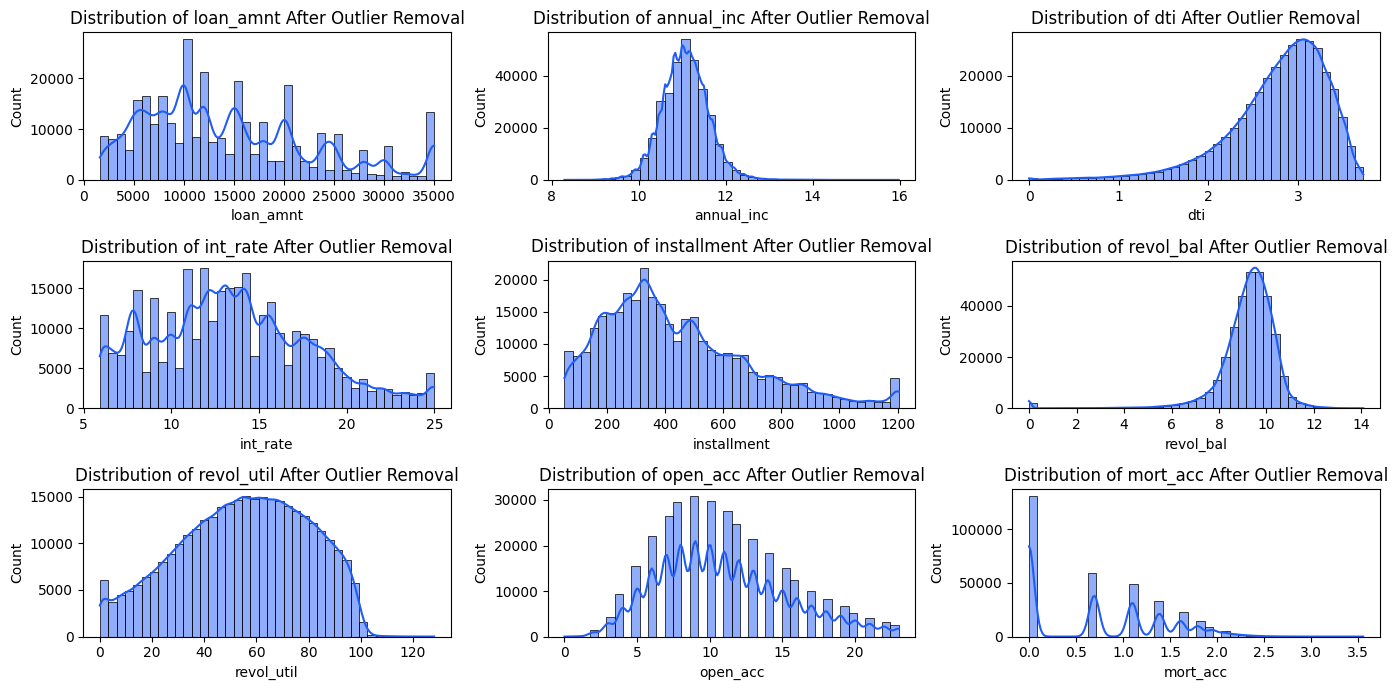

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(14, 7) )
selected_cols = ['loan_amnt', 'annual_inc', 'dti', 'int_rate', 'installment', 'revol_bal', 'revol_util', 'open_acc', 'mort_acc'] 
axes = axes.flatten()

for i, col in enumerate(selected_cols):
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i] , color=color1)
    axes[i].set_title(f'Distribution of {col} After Outlier Removal')

plt.tight_layout()
plt.show()

###     Feature Engineering and encoding

In [44]:
df_cleaned = df.copy()

In [45]:
df_cleaned.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10,RENT,11.669938,...,3.304686,16.0,0.0,10.501500,41.8,25.0,w,INDIVIDUAL,0.000000,0.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,11.082158,...,3.137666,17.0,0.0,9.910066,53.3,27.0,f,INDIVIDUAL,1.386294,0.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0,RENT,10.670303,...,2.623944,13.0,0.0,9.391661,92.2,26.0,f,INDIVIDUAL,0.000000,0.0


In [46]:
def drop_column(df, columns):
    df.drop(columns=columns, inplace=True)

In [47]:
# decoding loan status for prediction 
df_cleaned['loan_status_decode'] = df_cleaned['loan_status']
df_cleaned['loan_status_decode'] = df_cleaned['loan_status_decode'].map({'Fully Paid' : 0 , 'Charged Off' : 1 }).astype(int)
drop_column(df_cleaned, ['loan_status'])


In [48]:
loan_repayment_rate = df_cleaned.groupby(['home_ownership'])['loan_status_decode'].mean()
df_cleaned['home_ownership_repayment_rate'] = df_cleaned['home_ownership'].map(loan_repayment_rate).astype(float)
drop_column(df_cleaned, ['home_ownership'])

C:\Windows\Temp\ipykernel_8344\662396906.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_repayment_rate = df_cleaned.groupby(['home_ownership'])['loan_status_decode'].mean()


In [49]:
df_cleaned['home_ownership_repayment_rate'].value_counts()

home_ownership_repayment_rate
0.166161    164172
0.221724    133639
0.202325     31059
0.146789       109
0.233333        30
0.000000         3
Name: count, dtype: int64

In [50]:
# numbers for each grade so model can understand 
grade_order = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
df_cleaned['grade_encoded'] = df_cleaned['grade'].map(grade_order)
df_cleaned['grade_encoded'] = df_cleaned['grade_encoded'].astype(int)
drop_column(df_cleaned, ['grade'])

In [51]:
# Encoding sub_grade  (   A1 is best, G5 is worst   )
sub_grade_order = [f"{g}{n}" for g in "ABCDEFG" for n in range(1, 6)] 
df_cleaned['sub_grade_encoded'] = pd.Categorical(df_cleaned['sub_grade'], categories=sub_grade_order, ordered=True).codes
drop_column(df_cleaned, ['sub_grade'])

In [52]:
df_cleaned['initial_list_status'] = df_cleaned['initial_list_status'].map({'f' : 0 , 'w' : 1 }).astype(int)

In [53]:
df_cleaned['application_type'] = df_cleaned['application_type'].map({'INDIVIDUAL': 0, 'JOINT': 1, 'DIRECT_PAY': 2}).astype(int)

In [54]:
# new column loan to income ratio
df_cleaned['loan_to_income_ratio'] = df_cleaned['loan_amnt'] / df_cleaned['annual_inc']

In [55]:
df_cleaned['dti_adjusted'] = df_cleaned['dti'] / (df_cleaned['annual_inc'] + 1)  # Avoid division by zero

In [56]:
df_cleaned['credit_utilization'] = df_cleaned['revol_bal'] / (df_cleaned['total_acc'] + 1)

In [57]:
df_cleaned['loan_installment_ratio'] = df_cleaned['loan_amnt'] / (df_cleaned['installment'] + 1)


In [58]:
df_cleaned['mortgage_vs_loan'] = df_cleaned['mort_acc'] / (df_cleaned['loan_amnt'] + 1)


In [59]:
df_cleaned['employment_income_ratio'] = df_cleaned['emp_length'] / (df_cleaned['annual_inc'] + 1)

In [60]:
# term in months 
df_cleaned['term_in_months'] = df_cleaned['term'].str.extract('(\\d+)').astype(int)
df_cleaned.drop(columns=['term'], inplace=True)

In [61]:
df_cleaned['loan_risk_score'] = df_cleaned['grade_encoded'] * 10 + df_cleaned['sub_grade_encoded']

In [62]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['verification_status'], drop_first=True)


In [63]:
df_cleaned.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_title', 'emp_length',
       'annual_inc', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_status_decode',
       'home_ownership_repayment_rate', 'grade_encoded', 'sub_grade_encoded',
       'loan_to_income_ratio', 'dti_adjusted', 'credit_utilization',
       'loan_installment_ratio', 'mortgage_vs_loan', 'employment_income_ratio',
       'term_in_months', 'loan_risk_score',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object')

In [64]:
#it showing 'bool' data types we have to convert it to 'integer' so model will understand it better 
for col in df_cleaned.select_dtypes(include=['bool']).columns:
    df_cleaned[col] = df_cleaned[col].astype(int)

In [65]:
target_mean = df_cleaned.groupby('purpose')['loan_status_decode'].mean()
df_cleaned['purpose_encoded'] = df_cleaned['purpose'].map(target_mean).astype(int)
drop_column(df_cleaned, ['purpose'])

C:\Windows\Temp\ipykernel_8344\3405450001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_mean = df_cleaned.groupby('purpose')['loan_status_decode'].mean()


In [66]:
df_cleaned = df_cleaned.drop(columns=['emp_title'])

In [67]:
df_transformed = df_cleaned.copy()

In [68]:
df_transformed.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status_decode',
       'home_ownership_repayment_rate', 'grade_encoded', 'sub_grade_encoded',
       'loan_to_income_ratio', 'dti_adjusted', 'credit_utilization',
       'loan_installment_ratio', 'mortgage_vs_loan', 'employment_income_ratio',
       'term_in_months', 'loan_risk_score',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_encoded'],
      dtype='object')

In [69]:
df_transformed.dtypes

loan_amnt                              float64
int_rate                               float64
installment                            float64
emp_length                                int8
annual_inc                             float64
dti                                    float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
initial_list_status                      int32
application_type                         int32
mort_acc                               float64
pub_rec_bankruptcies                   float64
loan_status_decode                       int32
home_ownership_repayment_rate          float64
grade_encoded                            int32
sub_grade_encoded                         int8
loan_to_income_ratio                   float64
dti_adjusted                           float64
credit_utiliz

In [70]:
df_transformed.isnull().sum()


loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
application_type                       0
mort_acc                               0
pub_rec_bankruptcies                   0
loan_status_decode                     0
home_ownership_repayment_rate          0
grade_encoded                          0
sub_grade_encoded                      0
loan_to_income_ratio                   0
dti_adjusted                           0
credit_utilization                     0
loan_installment_ratio                 0
mortgage_vs_loan                       0
employment_incom

### VIF

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature_name'] = df_transformed.columns
    vif_data['VIF Values'] = [variance_inflation_factor(df_transformed.values,col_index) for col_index in range(df_transformed.shape[1])] # the shape[] give us number of column in a dataset
    return vif_data

vif_result = calculate_vif(df_transformed)  
print(vif_result) 

c:\Users\city computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\city computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Feature_name   VIF Values
0                             loan_amnt  1825.420433
1                              int_rate   226.395063
2                           installment   256.642623
3                            emp_length  1685.913295
4                            annual_inc  1042.821742
5                                   dti  3005.931266
6                              open_acc    15.569855
7                               pub_rec          NaN
8                             revol_bal   119.670710
9                            revol_util    10.401069
10                            total_acc    25.255983
11                  initial_list_status     1.732572
12                     application_type     1.003017
13                             mort_acc     6.344572
14                 pub_rec_bankruptcies          NaN
15                   loan_status_decode     1.360323
16        home_ownership_repayment_rate    85.245744
17                        grade_encoded       

In [73]:
df_transformed.drop(columns=['pub_rec_bankruptcies','pub_rec', 'purpose_encoded','sub_grade_encoded'], inplace=True)

#####     Train-Test Split , Standard Scaling and Handling Imbalanced Data

In [74]:

X = df_transformed.drop(columns= ['loan_status_decode'])
y = df_transformed['loan_status_decode']

In [75]:
# SMOTE OverSampling 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class Distribution After SMOTE:")


X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.DataFrame(y_resampled, columns=['loan_status_decode'])

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

# Check the new class distribution
print("Before Resampling:")
print(y.value_counts())

print("\nAfter Resampling:")
print(y_resampled['loan_status_decode'].value_counts())

Class Distribution After SMOTE:
Before Resampling:
loan_status_decode
0    265795
1     63217
Name: count, dtype: int64

After Resampling:
loan_status_decode
0    265795
1    265795
Name: count, dtype: int64


In [76]:
# scaler = StandardScaler()

# # # Fit on training data and transform both training and test data
# x_train_scaled = scaler.fit_transform(X_train)
# x_test_scaled = scaler.transform(X_test)  

# x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
# x_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)

# # print("Scaled Training Features")
# # print(x_train_scaled)

##### metrics score

In [77]:
df_transformed = pd.concat([X_train, y_train], axis=1)
correlation = df_transformed.corr()['loan_status_decode'].abs().sort_values(ascending=False)
print(correlation)

loan_status_decode                     1.000000
grade_encoded                          0.368886
loan_risk_score                        0.325020
int_rate                               0.318914
term_in_months                         0.205023
dti_adjusted                           0.176263
initial_list_status                    0.174050
dti                                    0.161473
verification_status_Source Verified    0.140350
revol_util                             0.121725
annual_inc                             0.115692
verification_status_Verified           0.112483
mortgage_vs_loan                       0.105174
mort_acc                               0.096633
home_ownership_repayment_rate          0.088736
loan_to_income_ratio                   0.082828
loan_installment_ratio                 0.073807
loan_amnt                              0.070410
emp_length                             0.069362
installment                            0.047367
total_acc                              0

In [78]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [79]:
def feature_importance(model, features):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature' : features.columns, 'Importance' : importances})
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], color=color1)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

#### models evaluation

In [80]:
rf = RandomForestClassifier(random_state=1,n_estimators = 500, min_samples_leaf = 3, max_features= 'sqrt', max_depth= 7, criterion= 'entropy')

rf.fit(X_train, y_train)
# Predict
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluate
print("Random Forest")
metrics_score(y_train, y_pred_train)
metrics_score(y_test, y_pred_test)

c:\Users\city computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

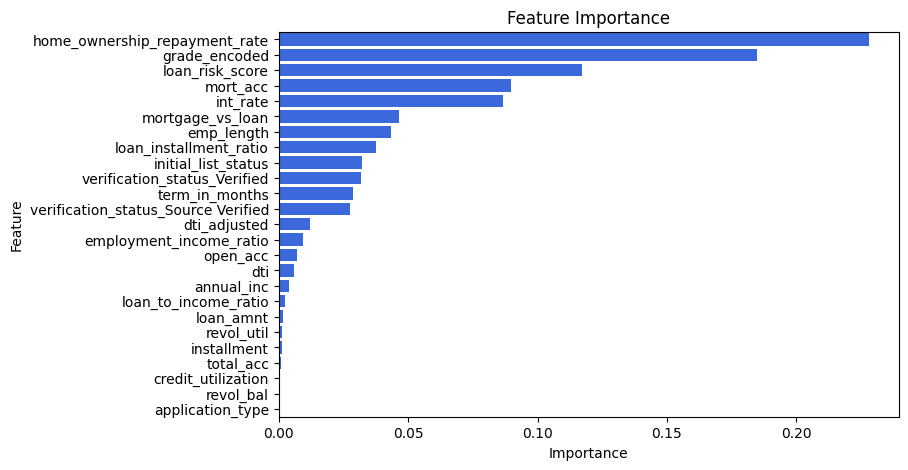

In [ ]:
feature_importance(rf, X_train)

c:\Users\city computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\city computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[LibLinear]Random Forest (not Decision Tree)
              precision    recall  f1-score   support

           0       0.74      0.77      0.75    185998
           1       0.76      0.72      0.74    186115

    accuracy                           0.75    372113
   macro avg       0.75      0.75      0.75    372113
weighted avg       0.75      0.75      0.75    372113



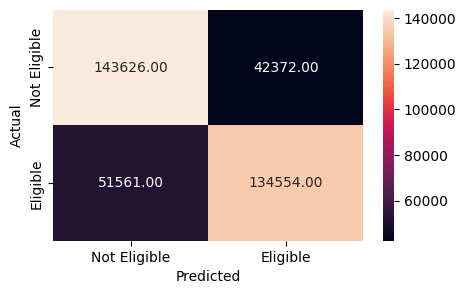

              precision    recall  f1-score   support

           0       0.74      0.77      0.75     79797
           1       0.76      0.72      0.74     79680

    accuracy                           0.75    159477
   macro avg       0.75      0.75      0.75    159477
weighted avg       0.75      0.75      0.75    159477



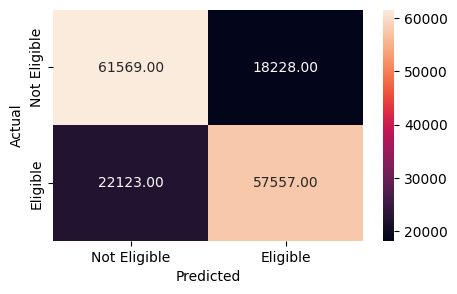

In [ ]:
from sklearn.linear_model import LogisticRegression


lg = LogisticRegression(random_state=1, class_weight = 'balanced', solver='liblinear', C=1, max_iter=1000, n_jobs=-1, verbose=1, penalty='l2')


lg.fit(X_train, y_train)
# Predict
y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)

# Evaluate
print("Random Forest (not Decision Tree)")
metrics_score(y_train, y_pred_train)
metrics_score(y_test, y_pred_test)

In [ ]:
feature_importance(lg, X_train)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

#### 

XGBoost
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    185998
           1       0.98      0.81      0.89    186115

    accuracy                           0.90    372113
   macro avg       0.91      0.90      0.90    372113
weighted avg       0.91      0.90      0.90    372113



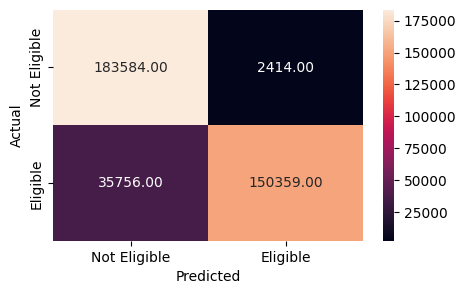

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     79797
           1       0.97      0.79      0.87     79680

    accuracy                           0.88    159477
   macro avg       0.89      0.88      0.88    159477
weighted avg       0.89      0.88      0.88    159477



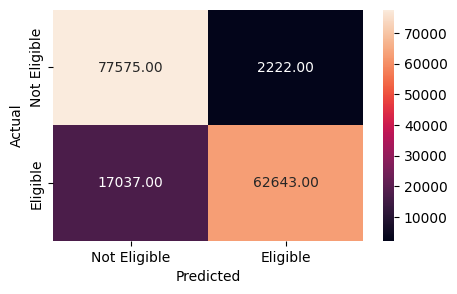

In [ ]:
from xgboost import XGBClassifier


xgb = XGBClassifier(random_state=1, n_estimators = 500, min_child_weight = 3, max_depth= 7, subsample= 0.8, colsample_bytree= 0.8, learning_rate= 0.1)


xgb.fit(X_train, y_train)
# Predict
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluate
print("XGBoost")
metrics_score(y_train, y_pred_train)
metrics_score(y_test, y_pred_test)

#### HypterParameter Tuning 

In [ ]:
# # Make your gadget
# xgb = XGBClassifier(random_state=1,  # Avoid warnings
#     eval_metric='logloss',    # For binary classification
#     nthread=-1)  

# param_grid = {
#     "n_estimators": [100, 300, 500],       
#     "min_child_weight": [1, 3, 5, 10],          
#     "subsample": [0.6, 0.8,0.8, 1.0] , 
#     "colsample_bytree": [0.6, 0.8, 0.9, 1.0] ,
#     "learning_rate": [0.1, 0.097, 0.085]
# }

# # Faster RandomizedSearchCV
# search = RandomizedSearchCV(
#    xgb,
#     param_distributions=param_grid,
#     n_iter=20,          # Reduced from 20 for speed
#     cv=5,              # Reduced from 5
#     scoring='recall',  # Changed to 'recall' for minority class (e.g., defaults)
#     n_jobs=1,          # Avoid multiprocessing issue
#     random_state=42,
#     error_score='raise'
# )
 
# search.fit(X_train, y_train)

# print("Best Settings:", search.best_params_)
# print("Best Score:", search.best_score_)


Best Settings: {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 10, 'learning_rate': 0.097, 'colsample_bytree': 1.0}
Best Score: 0.7839077989415146


In [1]:
xgb = XGBClassifier(random_state=1, n_estimators = 500, min_child_weight = 1, max_depth= 7, subsample= 1,  learning_rate= 0.1, colsample_bytree= 1)
xgb.fit(X_train, y_train)
# Predict
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluate
print("XGBoost")
metrics_score(y_train, y_pred_train)
metrics_score(y_test, y_pred_test)

NameError: name 'XGBClassifier' is not defined

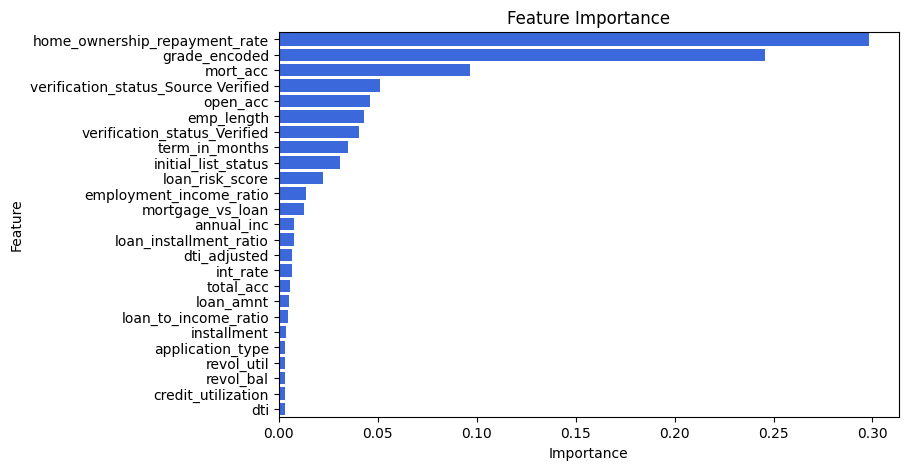

In [196]:
feature_importance(xgb, X_train)

In [200]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

def cross_validate_model(name, model, X_train, y_train, scoring, cv):
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)
    print(f"{name} - Mean {scoring}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    return np.mean(scores), np.std(scores)

# Store cross-validation results
cv_results = {}

# y_train = y_train.ravel()
# y_test = y_test.ravel()

# Cross-validation for XGBoost
cv_results["XGBoost"] = cross_validate_model("XGBoost", xgb, X_train, y_train, 'f1', 5)
cv_results_df = pd.DataFrame(cv_results, index=['Mean F1-Score', 'Std Deviation']).T

print("\nCross-Validation Results:")
print(cv_results)
print(cv_results_df)

XGBoost - Mean f1: 0.8655 ± 0.0010

Cross-Validation Results:
{'XGBoost': (0.8654665651233175, 0.0009939803585903133)}
         Mean F1-Score  Std Deviation
XGBoost       0.865467       0.000994


# CHECK PERFORMANCE OF DIFF MODELS 

                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.746979   0.759477  0.722352  0.740450  0.825123
Random Forest        0.767233   0.759687  0.781263  0.770324  0.857357
XGBoost              0.878522   0.965253  0.785128  0.865922  0.932223


<Figure size 1000x500 with 0 Axes>

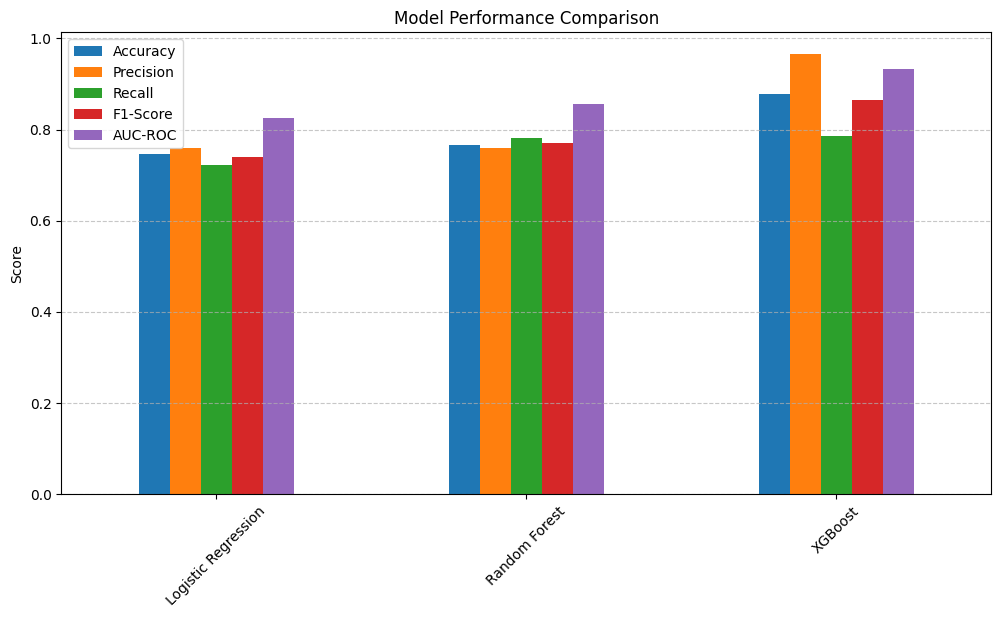

In [ ]:
# Initialize dictionary to store results
model_results = {}

# Define a function to evaluate each model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Store all metrics
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    }

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", lg, X_test, y_test)

# Evaluate Random Forest
evaluate_model("Random Forest", rf, X_test, y_test)

# Evaluate XGBoost
evaluate_model("XGBoost", xgb, X_test, y_test)

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T  # Transpose for better readability

# Print comparison table
print(results_df)
    
# Plot performance metrics
plt.figure(figsize=(10, 5))
results_df.plot(kind='bar', figsize=(14, 8))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
